In [1]:
# ===============================
# 1. Read Data
# ===============================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("cars_with_estimated_prices.csv")

In [4]:
print(df.shape)

print(df.info())

(8245, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null

In [5]:
df.describe()

,ID,Prod. year,Cylinders,Airbags,Price
count,8.245000e+03,8245.000000,8245.000000,8245.000000,8245.000000
mean,4.558331e+07,2010.911583,4.618799,6.519102,16846.101249
std,8.956823e+05,5.548762,1.817581,4.350323,6890.272076
min,2.126522e+07,1943.000000,1.000000,0.000000,2430.000000
25%,4.569648e+07,2009.000000,4.000000,4.000000,11688.600000
50%,4.577163e+07,2012.000000,4.000000,6.000000,17151.750000
75%,4.580180e+07,2014.000000,4.000000,12.000000,20621.080000
max,4.581664e+07,2020.000000,127.000000,16.000000,49729.680000


In [6]:
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,20582.10
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,18711.00
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,8400.00
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,22912.31
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,3240.00


In [7]:
#clean engine volume column
df["Engine_Size"] = df["Engine volume"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
df["Turbo"] = df["Engine volume"].str.contains("Turbo", case=False, na=False).astype(int)

df[["Engine volume", "Engine_Size", "Turbo"]].head()

,Engine volume,Engine_Size,Turbo
0,2.0 Turbo,2.0,1
1,2.4,2.4,0
2,1.5,1.5,0
3,3.2,3.2,0
4,1.6,1.6,0


In [8]:
#Clean Mileage column
df["Mileage"] = df["Mileage"].str.replace("km", "").str.replace(",", "").astype(float)
df["Mileage"].head()

0         0.0
1     26000.0
2    168000.0
3    143000.0
4    200000.0
Name: Mileage, dtype: float64

In [9]:
#clean doors column
df["Doors"] = df["Doors"].str.extract(r"(\d+)").astype(int)
df["Doors"].head()

0    2
1    4
2    4
3    4
4    4
Name: Doors, dtype: int64

In [10]:
#Clean Levyn column
df["Levy_num"] = df["Levy"].replace("-", np.nan).astype(float)


df[["Levy", "Levy_num"]].head()

,Levy,Levy_num
0,-,NaN
1,-,NaN
2,-,NaN
3,975,975.0
4,-,NaN


In [11]:
missing_levy = df['Levy_num'].isna().sum()
print(f"Number of missing values in 'Levy' column: {missing_levy}")
missing_percent = (missing_levy / len(df)) * 100
print(f"Percentage of missing values in 'Levy' column: {missing_percent:.2f}%")


Number of missing values in 'Levy' column: 2454
Percentage of missing values in 'Levy' column: 29.76%


In [12]:
df['Levy_num'] = df.groupby('Prod. year')['Levy_num'].transform(lambda x: x.fillna(x.median()))
print(df[["Levy", "Levy_num"]].head())
print (df.info())



  Levy  Levy_num
0    -     753.0
1    -     753.0
2    -    1594.0
3  975     975.0
4    -    5220.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   float64
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   int64  
 14  Wheel             8245 non-null   

c:\Program Files\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Program Files\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Program Files\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Program Files\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Program Files\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Program Files\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
 

In [13]:
#Feature engineering
df["Car_Age"] = 2024 - df["Prod. year"]

print(df["Car_Age"].head())

0    12
1    12
2    19
3    12
4    31
Name: Car_Age, dtype: int64


In [14]:
luxury_types = ["Jeep", "Coupe", "Cabriolet", "Convertible", "SUV"]
df["Luxury"] = (
    (df["Leather interior"] == "yes") & (df["Airbags"] >= 6) |
    (df["Category"].isin(luxury_types))
).astype(int)
df["Luxury"].head()


0    0
1    0
2    0
3    1
4    0
Name: Luxury, dtype: int64

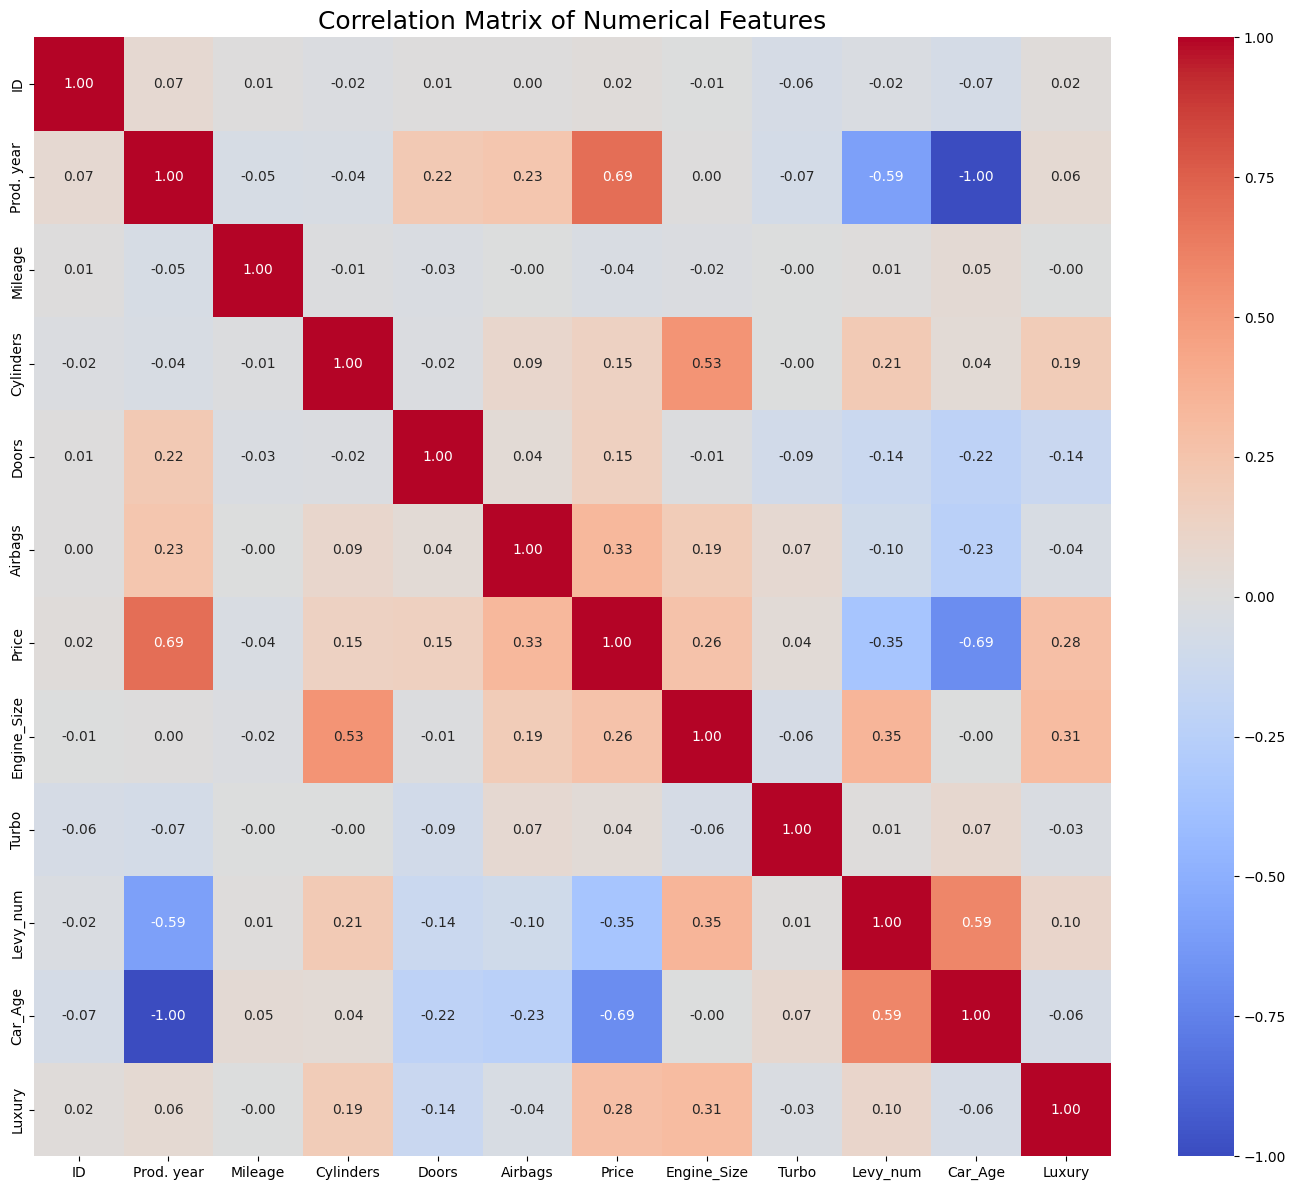

In [15]:
# --- 1. Correlation Heatmap
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.tight_layout()
plt.show()

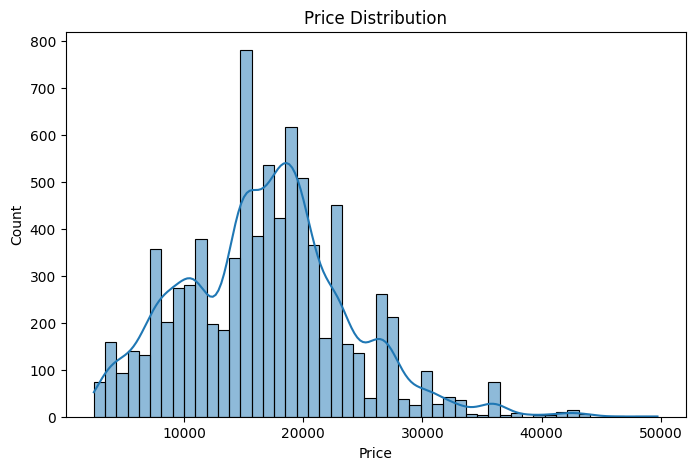

In [16]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()



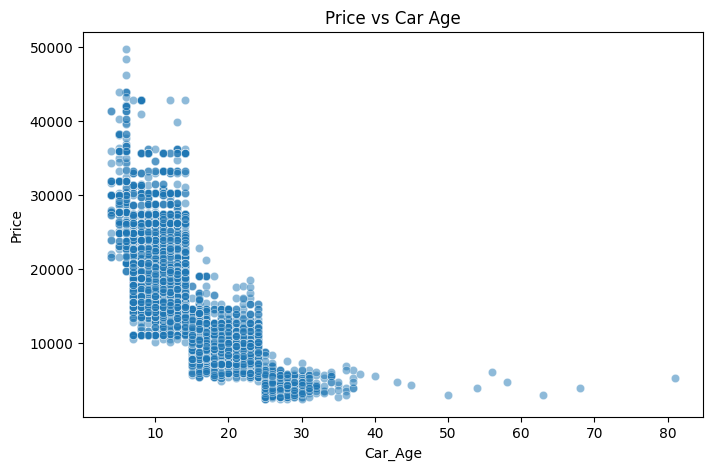

In [17]:
# Price vs Car Age
plt.figure(figsize=(8,5))
sns.scatterplot(x="Car_Age", y="Price", data=df, alpha=0.5)
plt.title("Price vs Car Age")
plt.show()

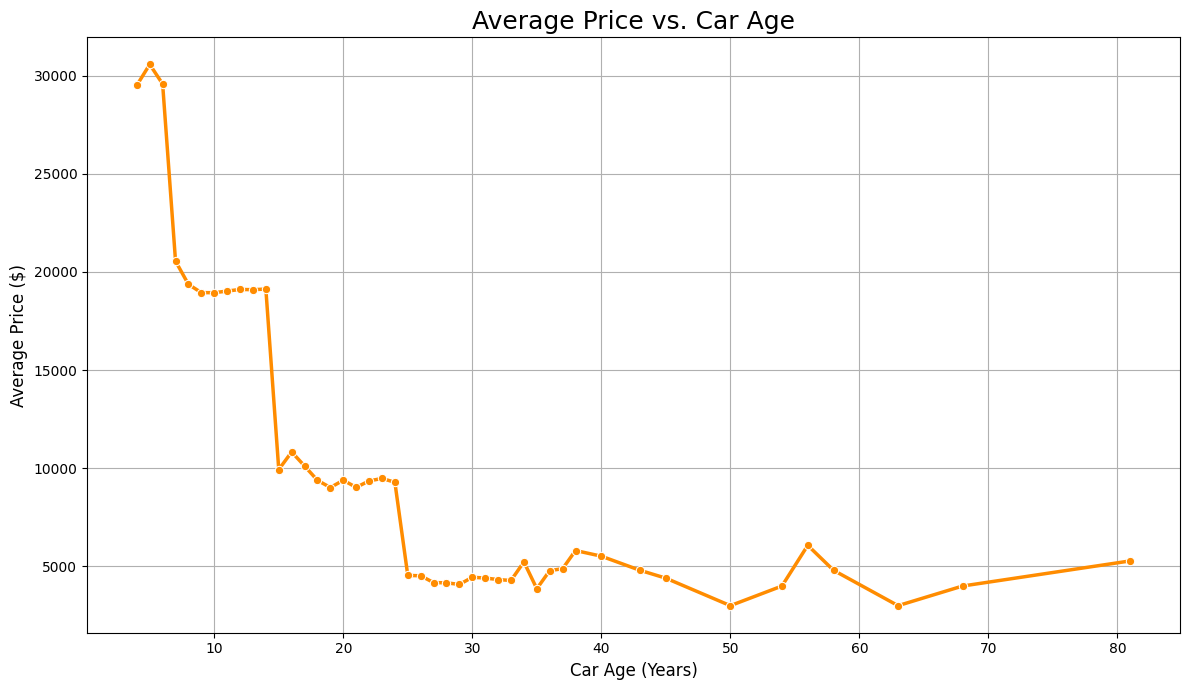

In [18]:
# Price vs. Car Age

avg_price_by_age = df.groupby('Car_Age')['Price'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='Car_Age', y='Price', data=avg_price_by_age, marker='o', color='darkorange', linewidth=2.5)
plt.title('Average Price vs. Car Age', fontsize=18)
plt.xlabel('Car Age (Years)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

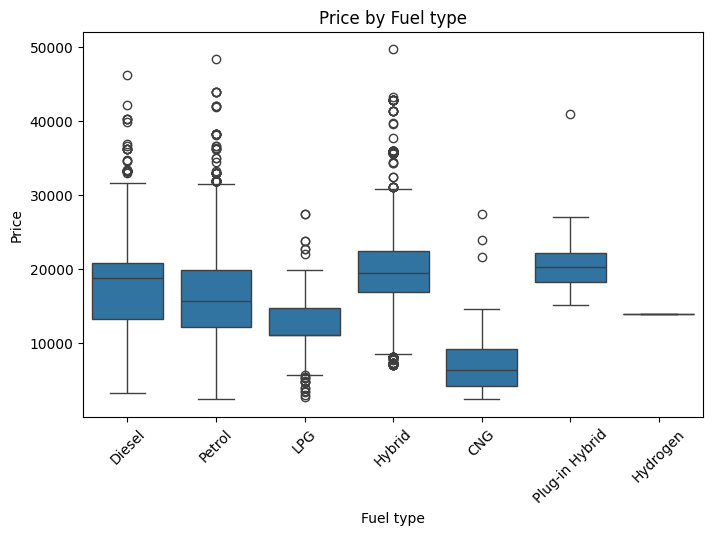

In [19]:

# Boxplot: Price by Fuel type
plt.figure(figsize=(8,5))
sns.boxplot(x="Fuel type", y="Price", data=df)
plt.title("Price by Fuel type")
plt.xticks(rotation=45)
plt.show()

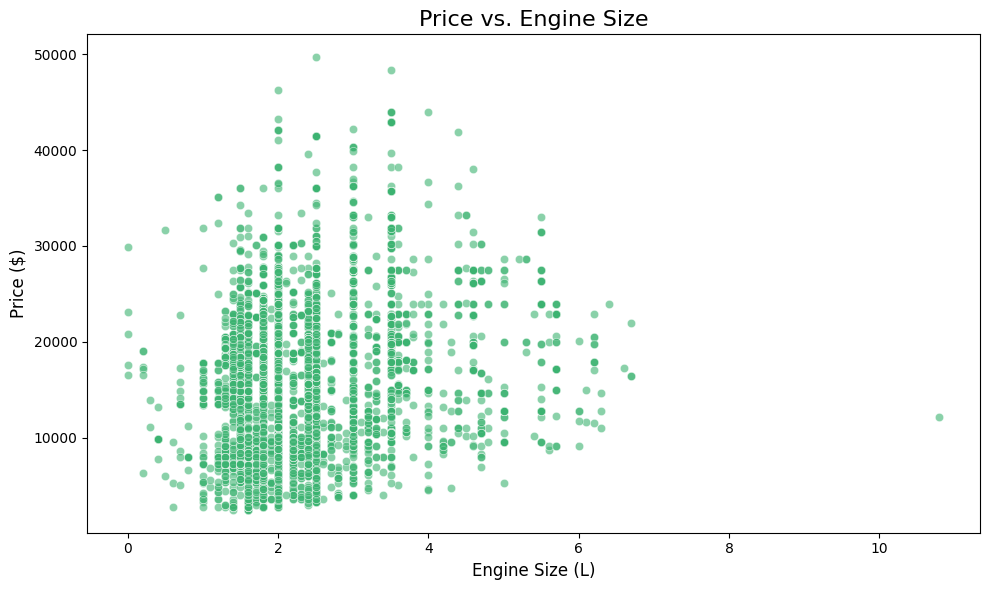

In [20]:
# --- 2. Price vs. Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine_Size', y='Price', data=df, alpha=0.6, color='mediumseagreen')
plt.title('Price vs. Engine Size', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

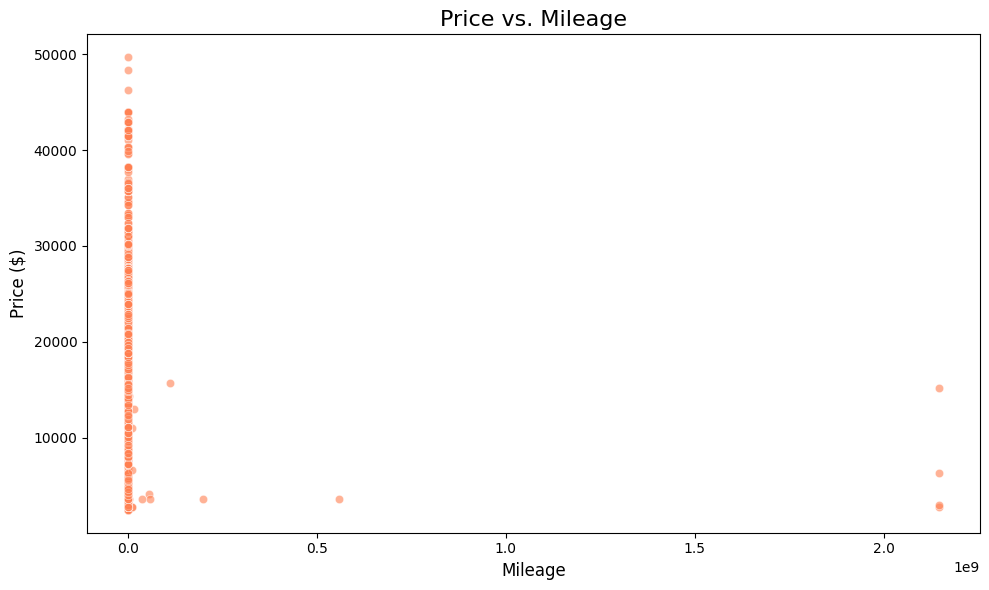

In [21]:
# --- 3. Price vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.6, color='coral')
plt.title('Price vs. Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\ALsayeD\AppData\Local\Temp\ipykernel_6060\2308844564.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Manufacturer', y='Price', data=df_top_manufacturers, palette='Set3', order=top_manufacturers)


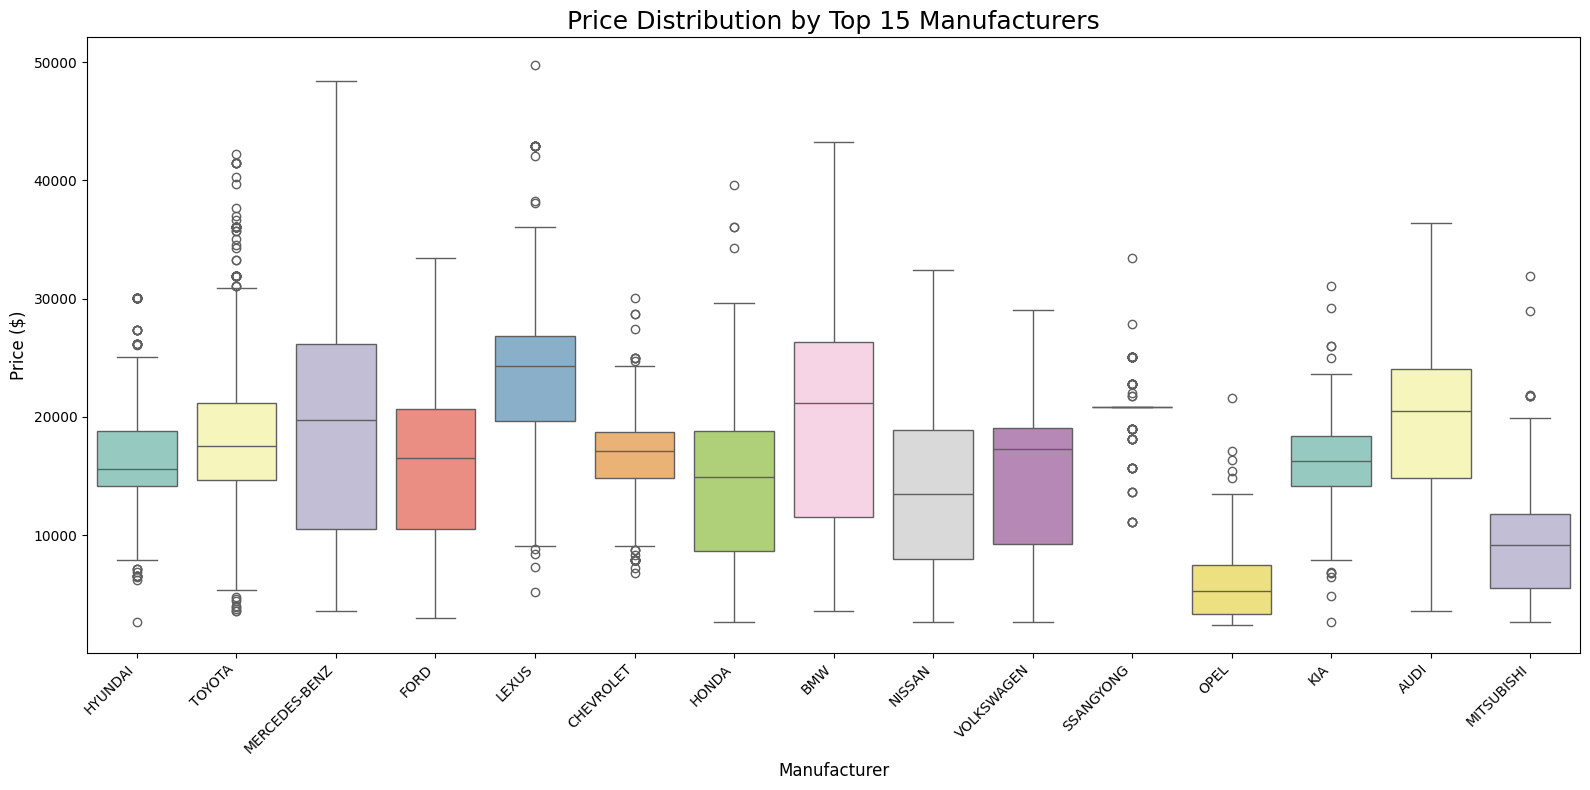

In [22]:
# --- 4. Price by Top 15 Manufacturers
manufacturer_counts = df['Manufacturer'].value_counts()
top_manufacturers = manufacturer_counts.head(15).index

df_top_manufacturers = df[df['Manufacturer'].isin(top_manufacturers)].copy()

plt.figure(figsize=(16, 8))
sns.boxplot(x='Manufacturer', y='Price', data=df_top_manufacturers, palette='Set3', order=top_manufacturers)
plt.title('Price Distribution by Top 15 Manufacturers', fontsize=18)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\ALsayeD\AppData\Local\Temp\ipykernel_6060\603286361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gear box type', data=df, order=df['Gear box type'].value_counts().index, palette='Blues_d')


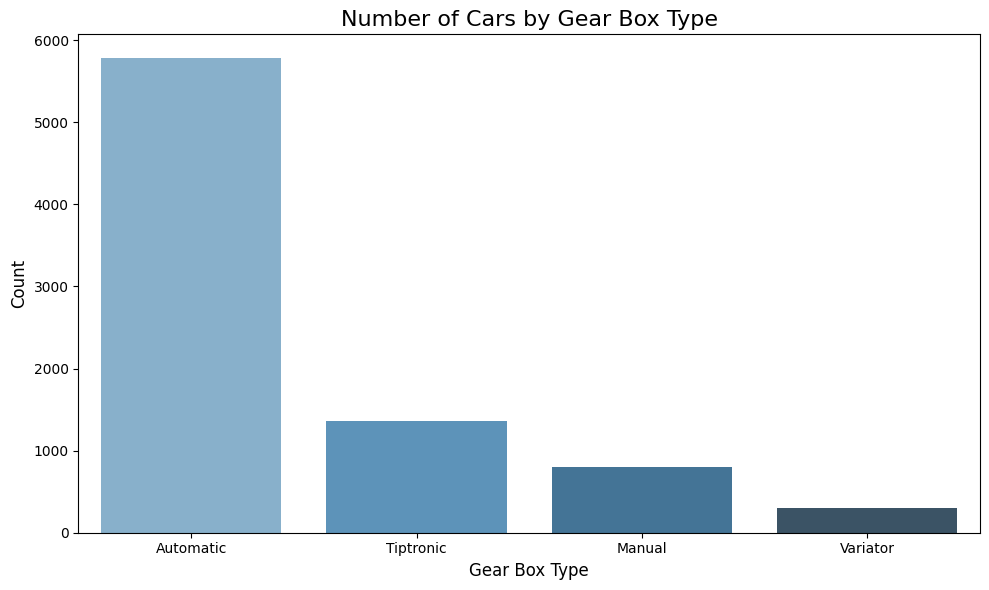

In [23]:
# --- 5. Count of Cars by Gear Box Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Gear box type', data=df, order=df['Gear box type'].value_counts().index, palette='Blues_d')
plt.title('Number of Cars by Gear Box Type', fontsize=16)
plt.xlabel('Gear Box Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\ALsayeD\AppData\Local\Temp\ipykernel_6060\4189958129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


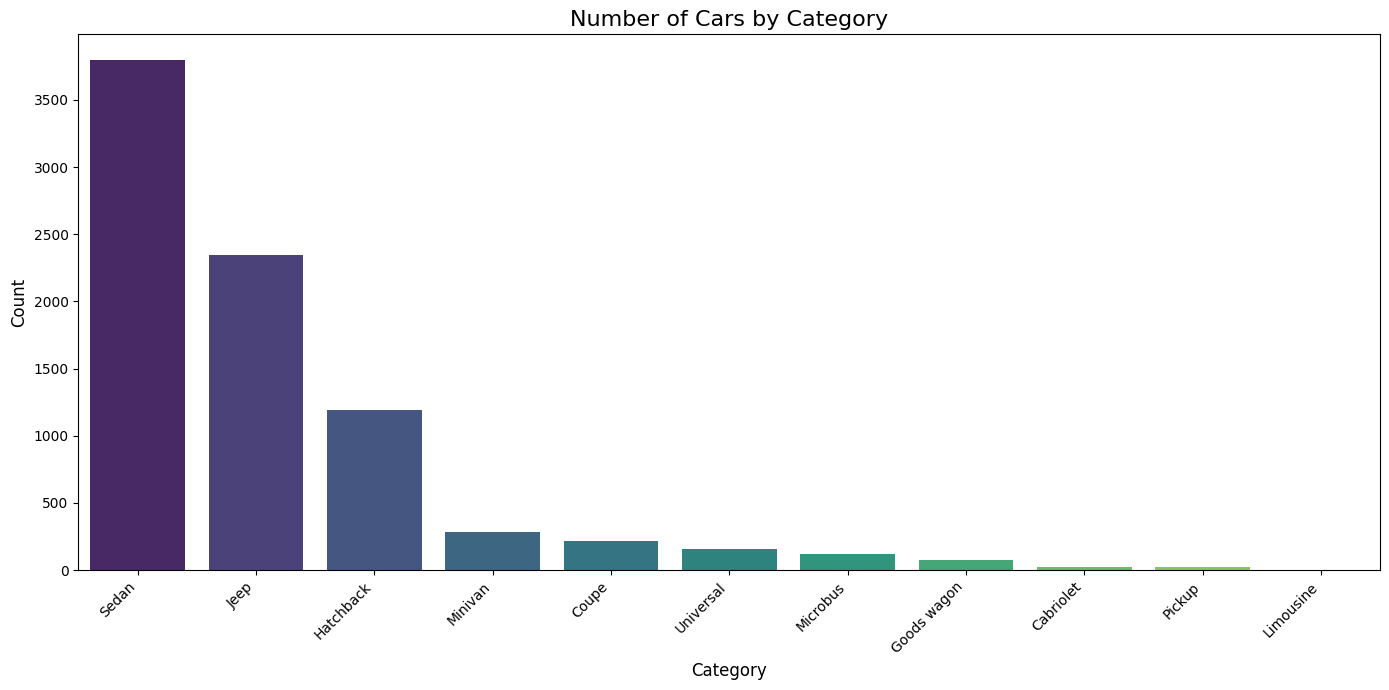

In [24]:
# --- 6. Count of Cars by Category
plt.figure(figsize=(14, 7))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Number of Cars by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

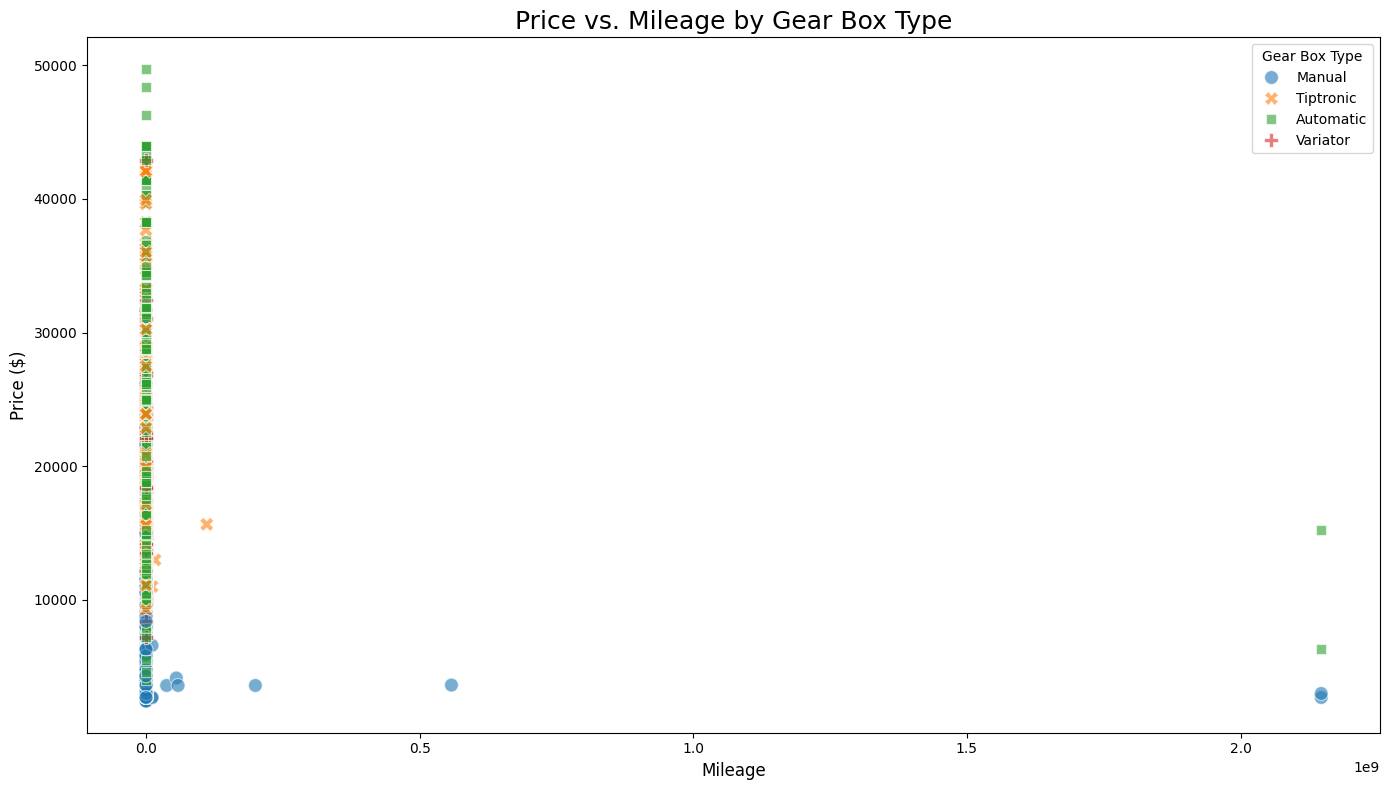

In [25]:
#Price vs. Mileage
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Mileage', y='Price', hue='Gear box type', style='Gear box type',
                data=df, alpha=0.6, s=100)
plt.title('Price vs. Mileage by Gear Box Type', fontsize=18)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Gear Box Type')
plt.tight_layout()
plt.show()

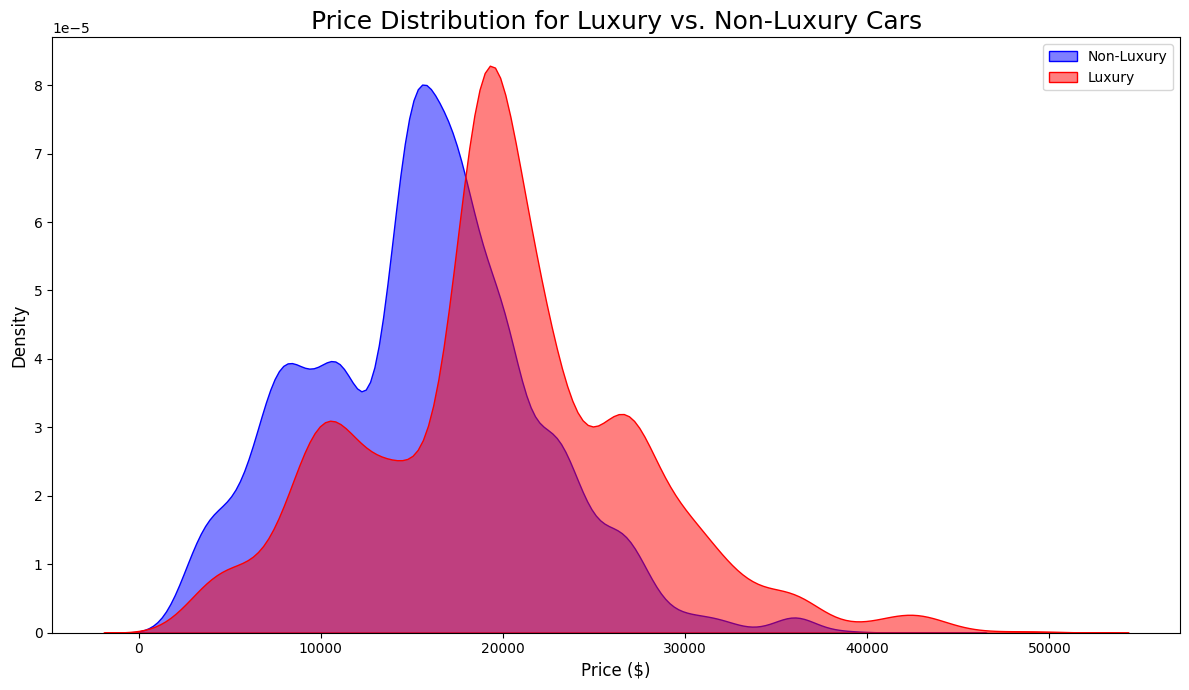

In [26]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df[df['Luxury'] == 0]['Price'], label='Non-Luxury', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df[df['Luxury'] == 1]['Price'], label='Luxury', fill=True, color='red', alpha=0.5)
plt.title('Price Distribution for Luxury vs. Non-Luxury Cars', fontsize=18)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

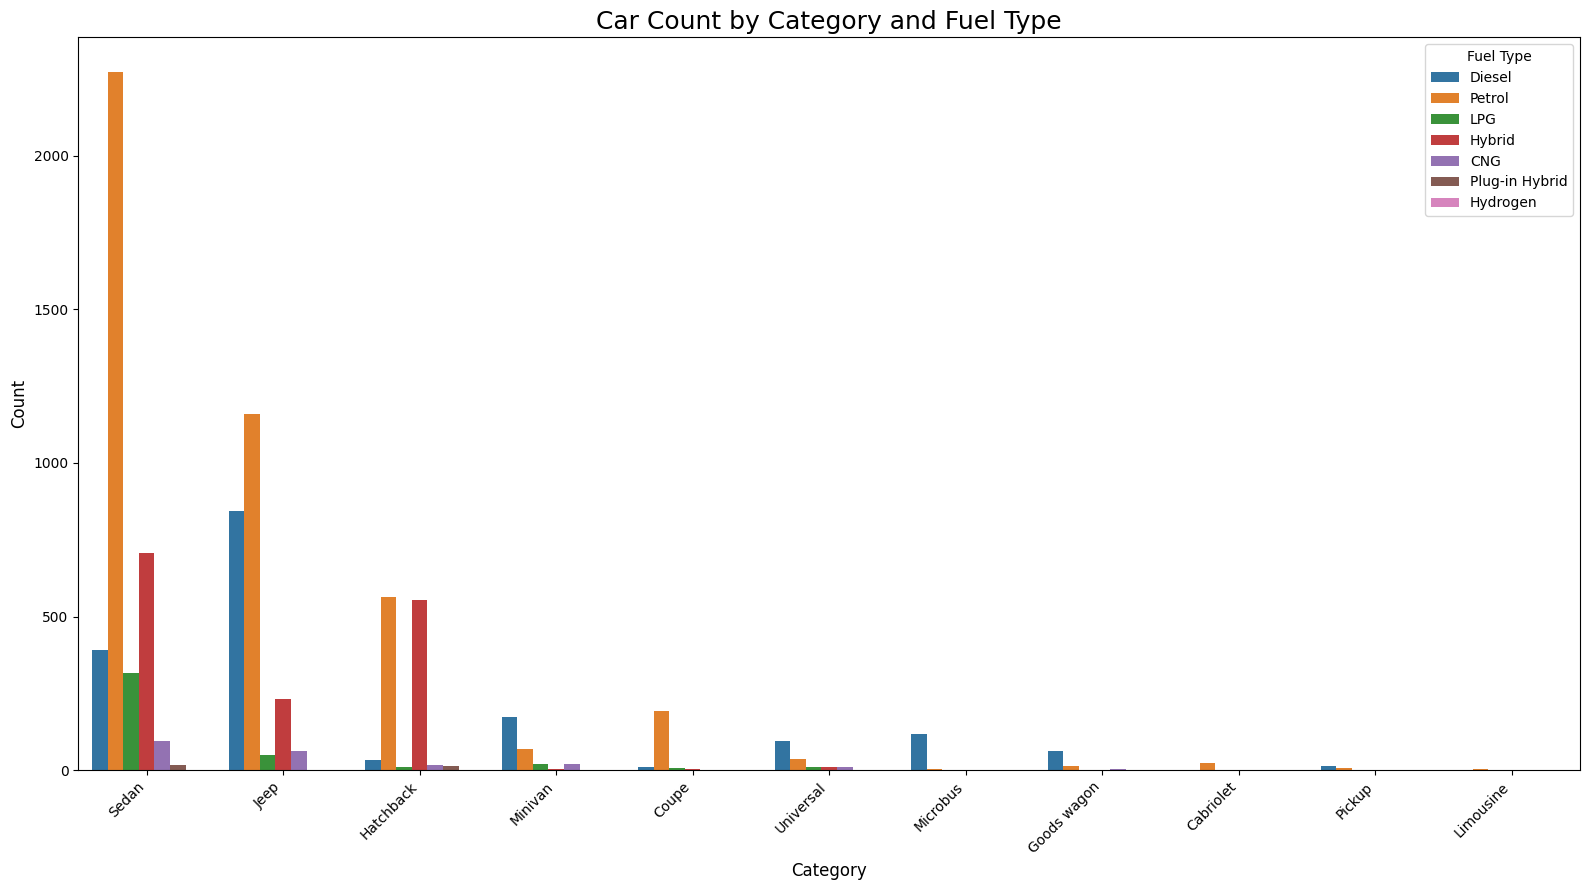

In [27]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x='Category', hue='Fuel type',
              order=df['Category'].value_counts().index)
plt.title('Car Count by Category and Fuel Type', fontsize=18)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

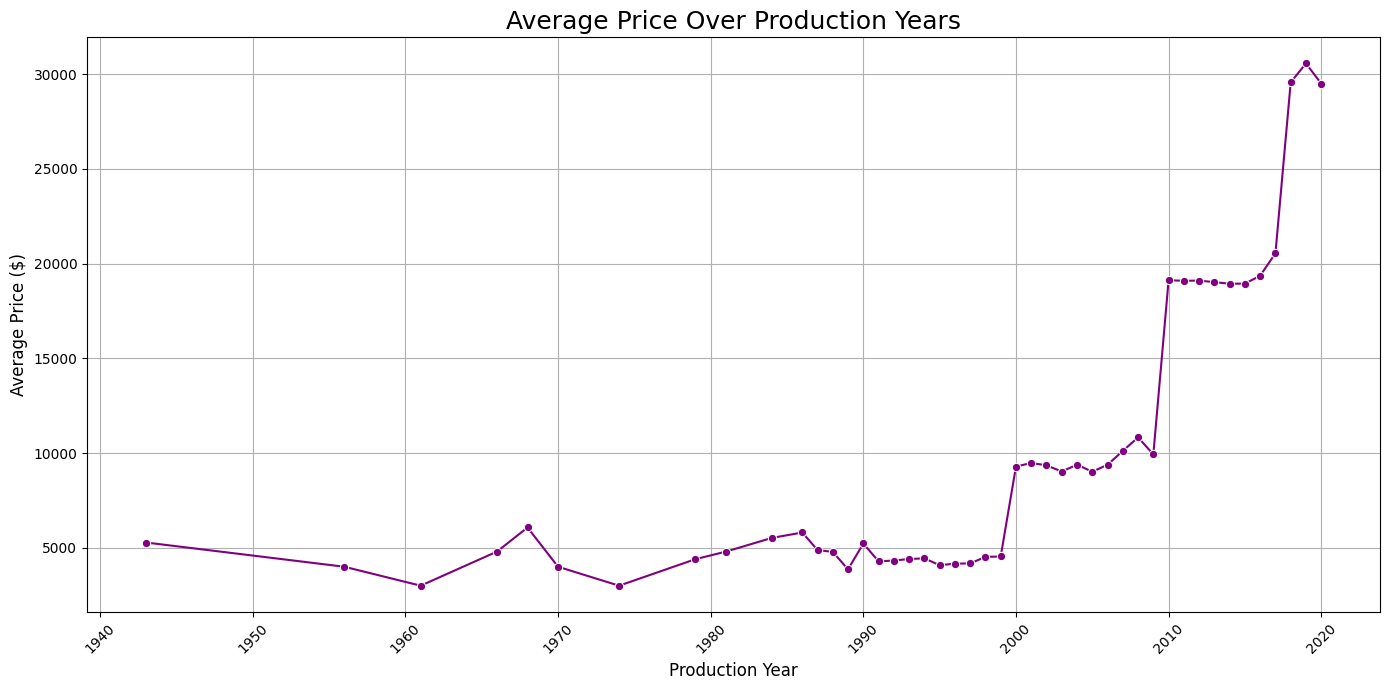

In [28]:
plt.figure(figsize=(14, 7))
price_by_year = df.groupby('Prod. year')['Price'].mean().reset_index()
sns.lineplot(x='Prod. year', y='Price', data=price_by_year, marker='o', color='purple')
plt.title('Average Price Over Production Years', fontsize=18)
plt.xlabel('Production Year', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df=df.drop(columns=["Levy","Engine volume","Color"],axis=1)

In [30]:
df.isnull().sum()

ID                    0
Manufacturer          0
Model                 0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Doors                 0
Wheel                 0
Airbags               0
Price                 0
Engine_Size           0
Turbo                 0
Levy_num            100
Car_Age               0
Luxury                0
dtype: int64

In [31]:
df["Levy_num"] = df["Levy_num"].fillna(df["Levy_num"].mean())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Manufacturer      8245 non-null   object 
 2   Model             8245 non-null   object 
 3   Prod. year        8245 non-null   int64  
 4   Category          8245 non-null   object 
 5   Leather interior  8245 non-null   object 
 6   Fuel type         8245 non-null   object 
 7   Mileage           8245 non-null   float64
 8   Cylinders         8245 non-null   int64  
 9   Gear box type     8245 non-null   object 
 10  Drive wheels      8245 non-null   object 
 11  Doors             8245 non-null   int64  
 12  Wheel             8245 non-null   object 
 13  Airbags           8245 non-null   int64  
 14  Price             8245 non-null   float64
 15  Engine_Size       8245 non-null   float64
 16  Turbo             8245 non-null   int64  


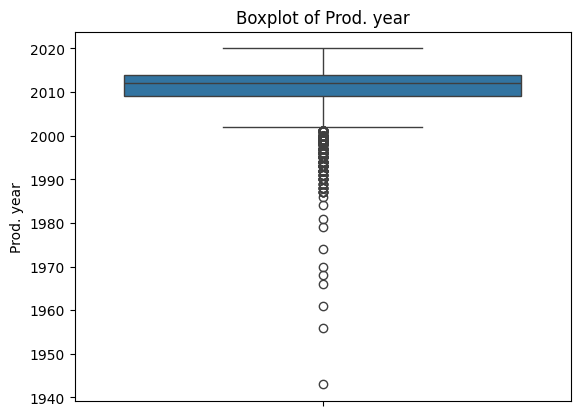

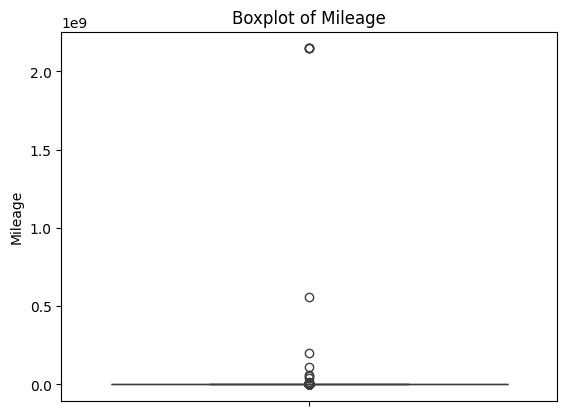

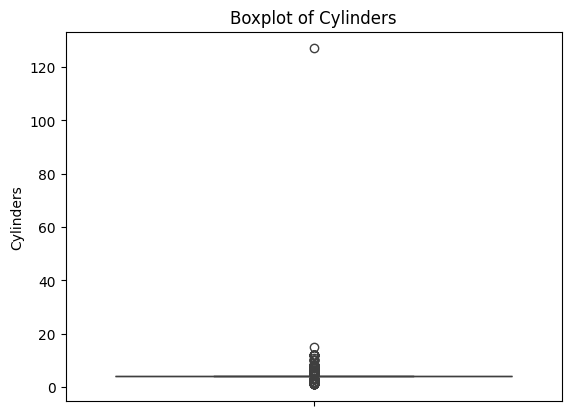

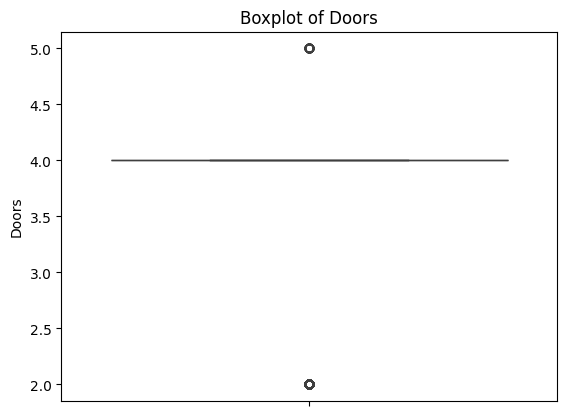

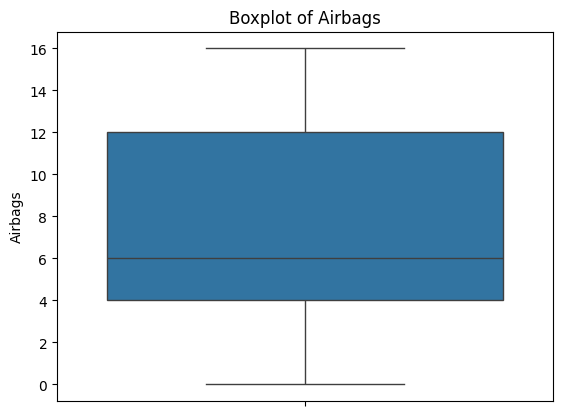

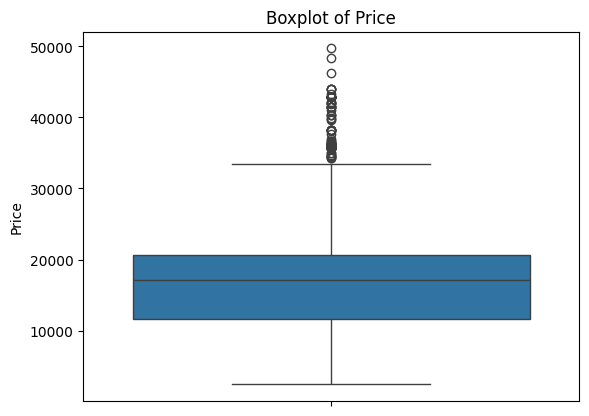

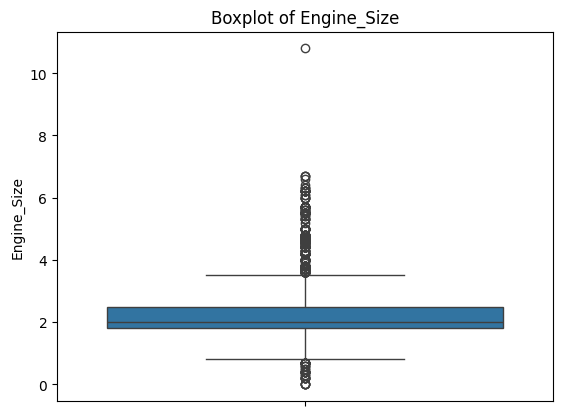

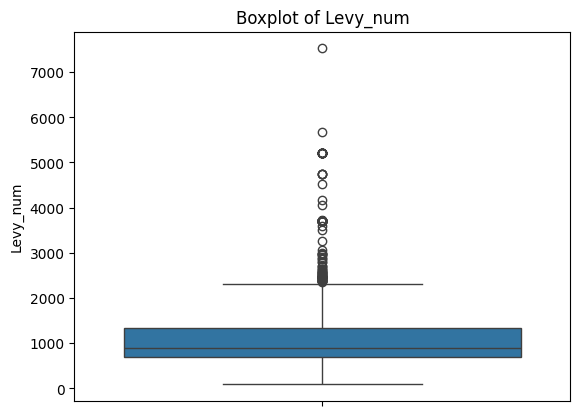

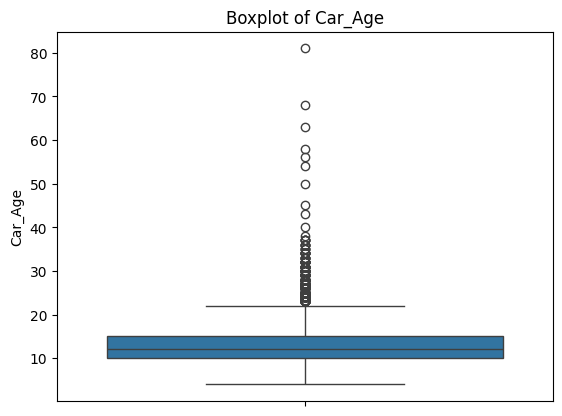

In [33]:
numerical_cols=df.select_dtypes("number")
numerical_cols=numerical_cols.drop(columns=["ID","Turbo","Luxury"],axis=1)
for column in numerical_cols:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


In [34]:
df.columns

Index(['ID', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Mileage', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags', 'Price',
       'Engine_Size', 'Turbo', 'Levy_num', 'Car_Age', 'Luxury'],
      dtype='object')

In [35]:
# --- 1. Drop leakage columns ---
df = df.drop(columns=['ID','Levy_num','Luxury','Car_Age'])

# --- 2. Define features & target ---
X = df.drop(columns=['Price'])
y = df['Price']

# --- 3. Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [36]:
onehot_cols = ['Leather interior','Fuel type','Gear box type','Drive wheels','Doors','Wheel','Turbo']
targetenc_cols = ['Manufacturer','Model']
numeric_cols = ['Prod. year','Mileage','Cylinders','Airbags','Engine_Size']


onehot = OneHotEncoder(handle_unknown='ignore')
target_enc = ce.TargetEncoder(cols=targetenc_cols)
scaler_numeric = StandardScaler()
scaler_target = StandardScaler()

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot, onehot_cols),
        ('target', Pipeline([
            ('target_enc', target_enc),
            ('scaler_target', scaler_target)
        ]), targetenc_cols),
        ('scaler', scaler_numeric, numeric_cols)
    ],
    remainder='drop'
)

# --- Pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# --- تدريب وتنبؤ ---
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [41]:
# --- 9. Evaluate ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔹 Evaluation Metrics for Random Forest Regression")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


🔹 Evaluation Metrics for Random Forest Regression
MAE : 628.7718820279871
RMSE: 1447.50623559843
R²  : 0.9558383251237487


In [39]:
# ===============================================
#  10. Prediction on New, Unseen Data
# ===============================================

# --- أ. جهّز بيانات العربية اللي عايز تتوقع سعرها ---
# تقدر تغير القيم دي زي ما تحب وتجرب بنفسك

new_car_data = {
    'Manufacturer': 'VOLKSWAGEN',
    'Model': 'Golf',
    'Prod. year': 2012,
    'Category': 'Hatchback',
    'Leather interior': 'No',
    'Fuel type': 'Diesel',
    'Mileage': 0,
    'Cylinders': 4,
    'Gear box type': 'Manual',
    'Drive wheels': 'Front',
    'Doors': '2.0',         # لازم تكون نص زي البيانات الأصلية
    'Wheel': 'Left wheel',
    'Color': 'Grey',
    'Airbags': 10,
    'Engine_Size': 2,
    'Turbo': 1,             # 0 means No, 1 means Yes           # 0 means No, 1 means Yes
}

# --- ب. حوّل البيانات دي لـ Pandas DataFrame ---
# الموديل بيستقبل البيانات كـ DataFrame
new_car_df = pd.DataFrame([new_car_data])


# --- ج. استخدم الـ pipeline اللي دربته عشان تتوقع السعر ---
# الـ pipeline هيعمل كل خطوات التجهيز والتوقع بشكل تلقائي
predicted_price = pipeline.predict(new_car_df)


# --- د. اطبع النتيجة النهائية ---
# بنستخدم [0] عشان نجيب القيمة الوحيدة اللي في مصفوفة النتائج
print("✨ تم حساب السعر بنجاح ✨")
print("---------------------------------")
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

✨ تم حساب السعر بنجاح ✨
---------------------------------
Predicted Price: $21,848.07
